In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [2]:
state = 'BR'

In [3]:
c_dataset = pd.read_csv("Confirmed - copy.csv")
c_dataset['Date'] = pd.to_datetime(c_dataset['Date'], infer_datetime_format=True)
c_data = c_dataset.set_index(['Date'])
c_data = c_data[[state]]
c_data[state] = c_data[state].fillna(0)

In [4]:
cases = c_data[state].resample('D').mean()#D,W,MS

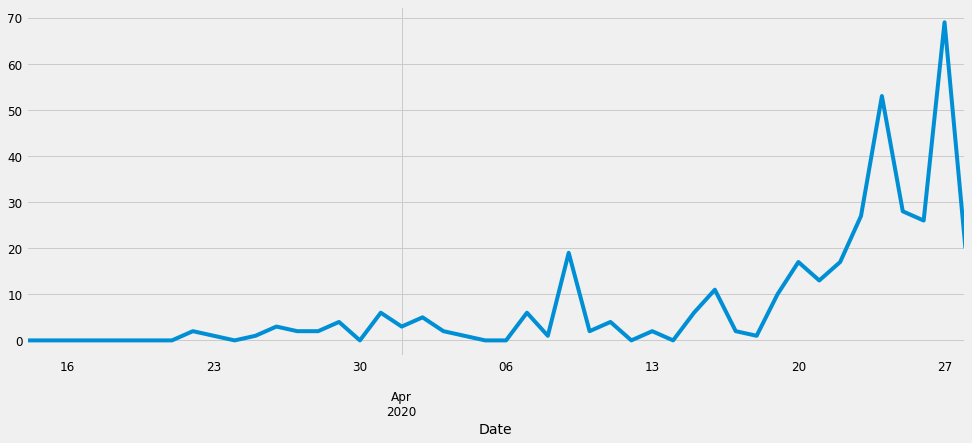

In [5]:
cases.plot(figsize=(15, 6))
plt.show()

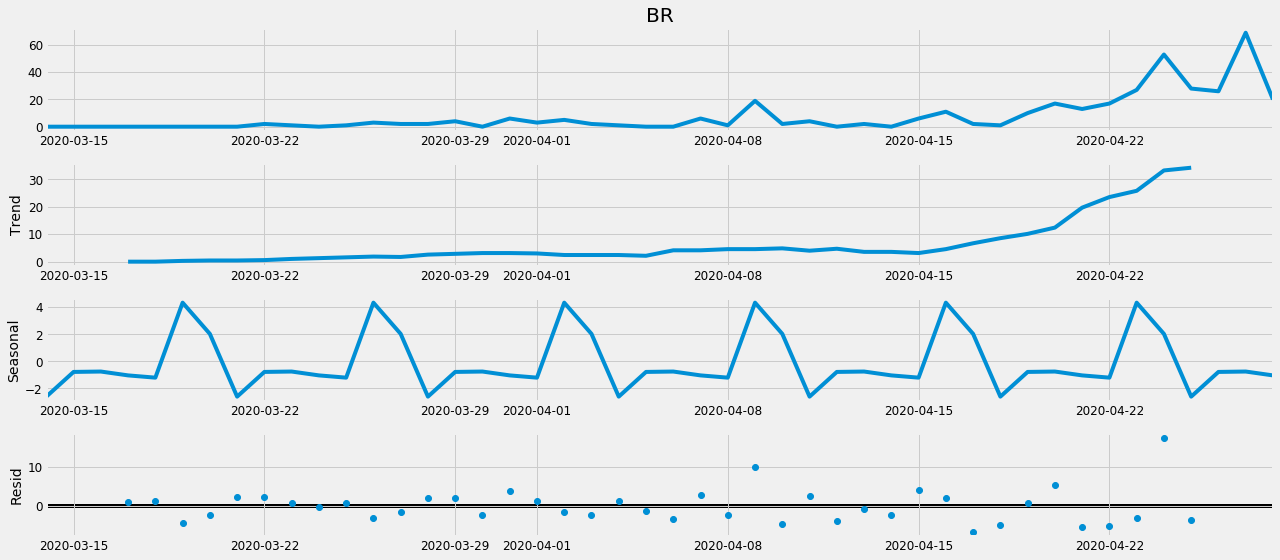

In [6]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
c_decomposition = sm.tsa.seasonal_decompose(cases, model='additive')
c_fig = c_decomposition.plot()
plt.show()

In [7]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [8]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            cases_mod = sm.tsa.statespace.SARIMAX(cases,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            cases_results = cases_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, cases_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:379.95052355562706


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1653.7598103328867
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:283.7746130381362
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:192.525558443318
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:291.71745728295303


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1415.7595132524946
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:200.39458035855696
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:194.37175043796438
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:353.09542123172685


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1536.330377115663
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:269.8102154642269
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:179.9977801750858
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:284.6501586429406
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1561.9931988655283
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:193.08968750373782
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:179.14633222218976
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:348.3494158732307


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1318.860123129411
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:270.39417188144597
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:178.13699251907858
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:272.6288788152594


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1675.0328812708353
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:183.57586056794372
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:177.88425412643878
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:325.0581031676313


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1164.2617451280441
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:251.50623576184114
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:162.92471604265648
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:260.7501241860923


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1205.2461791553192
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:176.24223813983016
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:162.2899234264
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:350.82883052870187


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1498.1024277211927
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:272.14611599298416
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:184.11395351199565
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:270.4494329421797


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1524.2147642432312
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:182.3108300571176
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:184.31065530940052
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:327.4497234649017


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1399.104023082462
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:259.57173354011286
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:171.4503501220642
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:256.694648367015


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1279.4588057759797
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:175.1716084202573
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:173.44942233297837
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:333.7318136757555


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1550.1391926263439
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:259.0607552330373
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:172.38102414965164
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:255.62949051655977


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1592.1150565007488
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:170.2441977324923
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:172.21401083042136
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:323.5296965094038


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1347.0830511456077
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:251.1979688456373
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:163.45598601867096
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:253.2936503589536


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1399.4471657739207
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:169.0918556700976
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:162.79564489893096


In [9]:
c_mod = sm.tsa.statespace.SARIMAX(cases,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
cases_results = c_mod.fit()
print(cases_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4255      0.502     -0.847      0.397      -1.410       0.559
ma.L1         -0.4412      0.503     -0.876      0.381      -1.428       0.545
ma.S.L12      -0.8031      2.153     -0.373      0.709      -5.023       3.417
sigma2       174.5042    268.686      0.649      0.516    -352.110     701.118


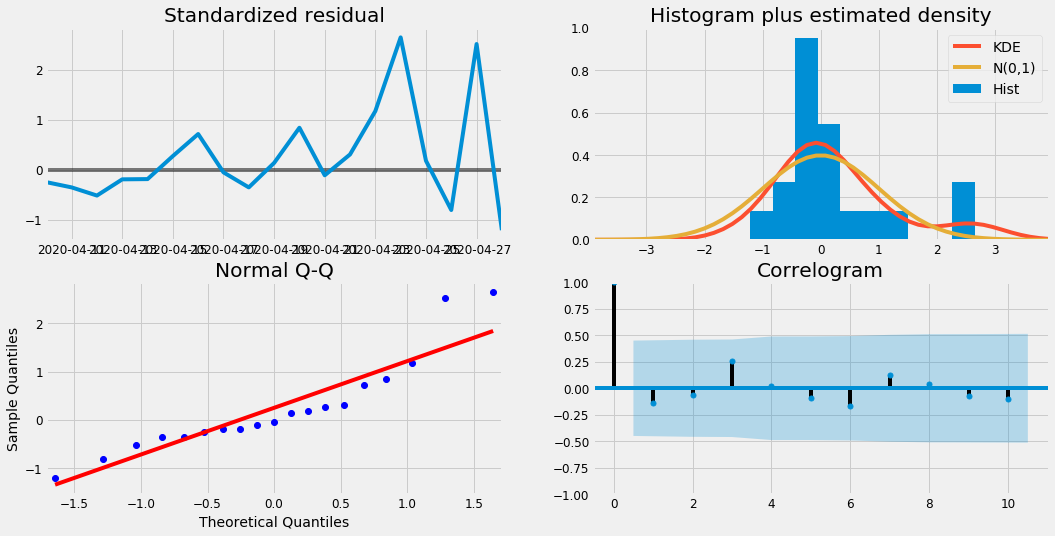

In [10]:
cases_results.plot_diagnostics(figsize=(16, 8))
plt.show()

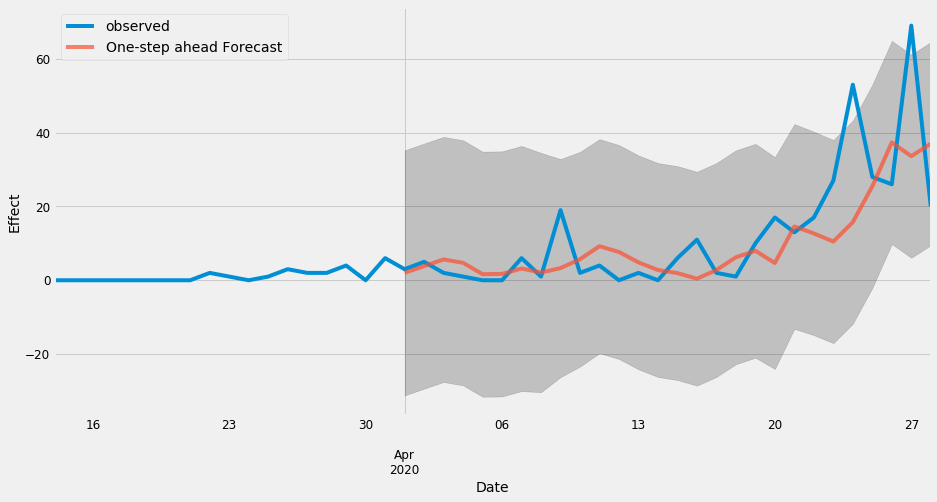

In [11]:
cases_pred = cases_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
cases_pred_ci = cases_pred.conf_int()
cases_ax = cases['2020':].plot(label='observed')
cases_pred.predicted_mean.plot(ax=cases_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.2)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [12]:
cases_forecasted = cases_pred.predicted_mean
cases_truth = cases['2020-04-01':]
cases_mse = ((cases_forecasted - cases_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(cases_mse, 2)))

The Mean Squared Error of our forecasts is 145.58


In [13]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(cases_mse), 2)))

The Root Mean Squared Error of our forecasts is 12.07


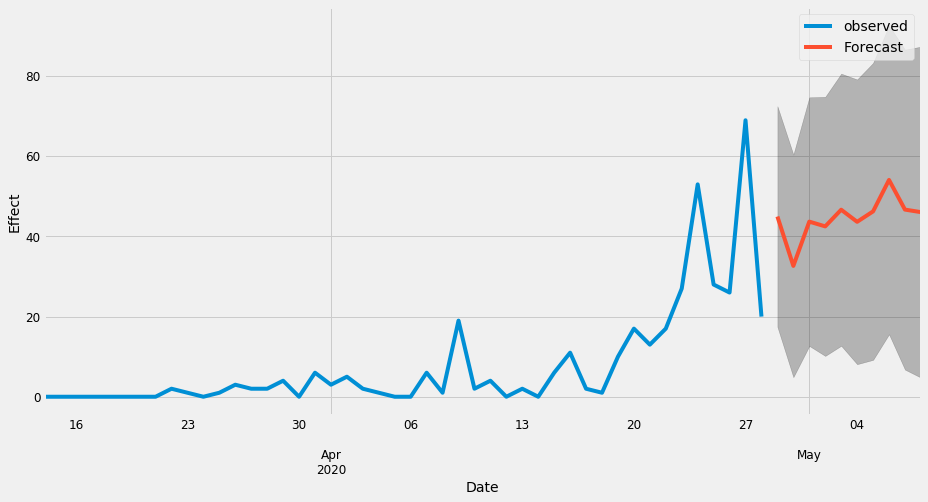

In [14]:
cases_pred_uc = cases_results.get_forecast(steps=10)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)
cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [15]:
r_dataset = pd.read_csv("Recovered.csv")
r_dataset['Date'] = pd.to_datetime(r_dataset['Date'], infer_datetime_format=True)
r_data = r_dataset.set_index(['Date'])
r_data = r_data[[state]]
r_data[state] = r_data[state].fillna(0)

In [16]:
total_data = pd.DataFrame()
total_data['Cases'] = c_data[state]
total_data['Recovered'] = r_data[state]

In [17]:
total_data.tail()

,Cases,Recovered
Date,,
2020-04-24,53,0
2020-04-25,28,1
2020-04-26,26,11
2020-04-27,69,0
2020-04-28,20,8


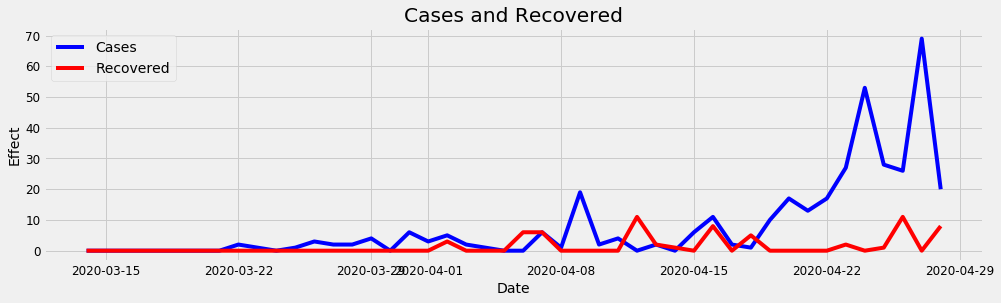

In [18]:
plt.figure(figsize=(15, 4))
plt.plot(total_data.index, total_data['Cases'], 'b-', label = 'Cases')
plt.plot(total_data.index, total_data['Recovered'], 'r-', label = 'Recovered')
plt.xlabel('Date'); plt.ylabel('Effect'); plt.title('Cases and Recovered')
plt.legend()
plt.show()

In [19]:
recovered = total_data['Recovered'].resample('D').mean()

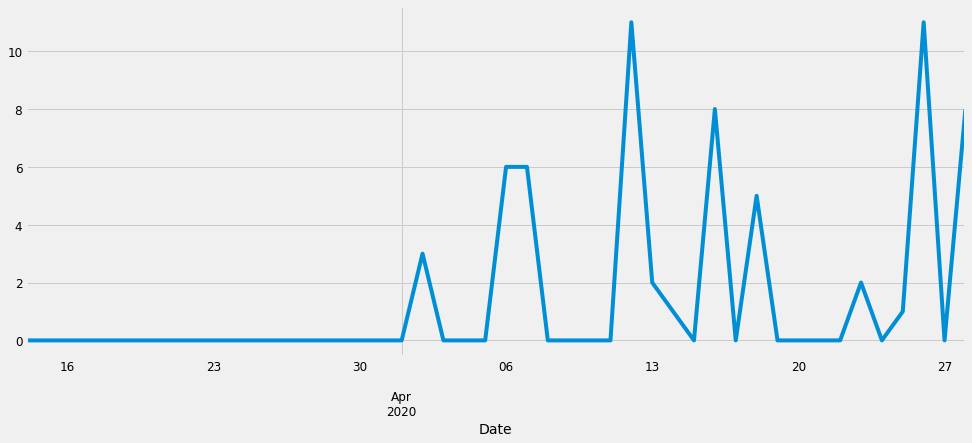

In [20]:
recovered.plot(figsize=(15, 6))
plt.show()

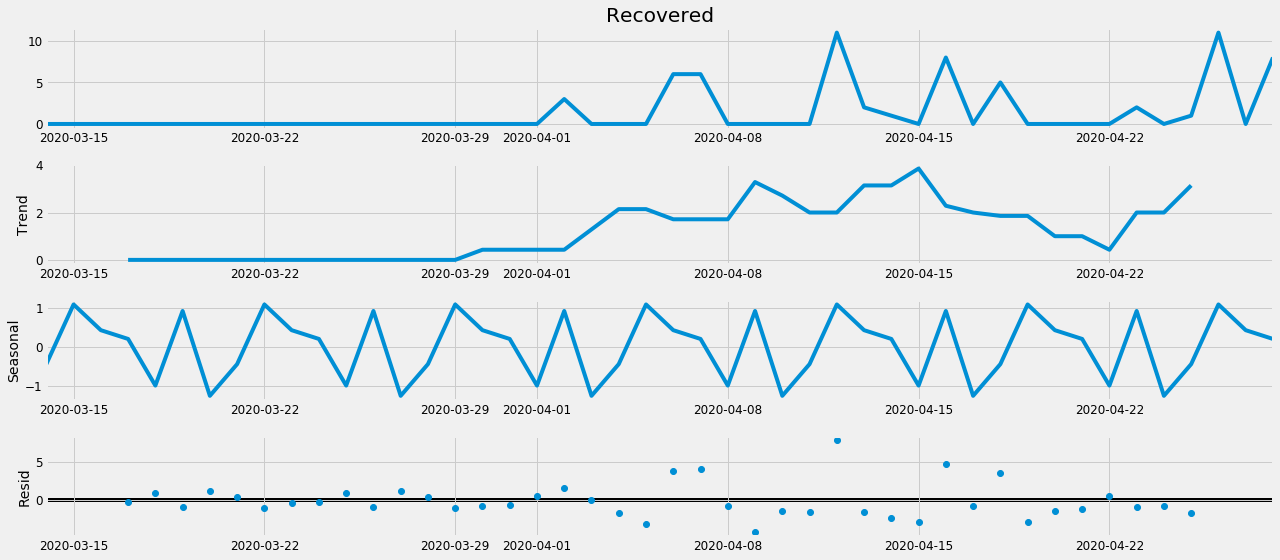

In [21]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
recovered_decomposition = sm.tsa.seasonal_decompose(recovered, model='additive')
fig = recovered_decomposition.plot()
plt.show()

In [22]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            recovered_results = recovered_mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, recovered_results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:236.7840440245149
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1141.1489208954515


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:187.70313079792598
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:122.15159386618032
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:187.64610425084857


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1300.5287377664301
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:127.85472977818468
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:122.53593324488125
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:233.91232191324048


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:1208.1318820515603
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:184.65052440210687
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:119.55076961798562
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:189.3289207157588


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1224.6676585534406
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:129.83299964706663
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:119.7981018653281
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:252.57426249838315
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1296.880823035974

C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)



ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:202.8284294781824
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:129.74095955147263
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:200.92758335616287


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1187.0470801630445
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:134.102097617659
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:129.62341478714444
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:221.61721874871245


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1077.9823938902275
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:181.55112093387686
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:113.15677855673036
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:181.85241751702875


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1076.674196169505
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:121.61121002782247
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:109.5073038028034
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:237.66415940317967


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1079.265545814388
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:189.52861188908426
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:124.14024492840109
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:184.88245631029324


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1054.568240704781
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:122.95330853742247
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:124.50769190607473
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:227.0681170408059
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1309.1707254794205
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:185.56280004283198
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:119.64090172758007
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:183.15903271092728
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:1315.7580125166312
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:124.96665197453453
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:121.6701076450882
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:236.14105015387688


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1251.1624382824352
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:201.7636779489778
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:126.22019294917585
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:183.54877089996813


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1249.6423853723022
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:119.01418845835148
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:118.8559970131631
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:222.45756577291098


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1304.7750738414593
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:183.4938614024429
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:114.85122337857777
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:178.51966961231875


C:\Users\VARUN\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1303.3607135731966
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:116.09322095921942
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:109.89938051843036


In [23]:
#ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:199.83565329572556
recovered_mod = sm.tsa.statespace.SARIMAX(recovered,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
recovered_results = recovered_mod.fit()
print(recovered_results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1294      0.645     -0.201      0.841      -1.394       1.135
ma.L1         -1.0000   5272.424     -0.000      1.000   -1.03e+04    1.03e+04
ma.S.L12      -1.0000   1.08e+04  -9.26e-05      1.000   -2.12e+04    2.12e+04
sigma2        10.4320   1.51e+05   6.93e-05      1.000   -2.95e+05    2.95e+05


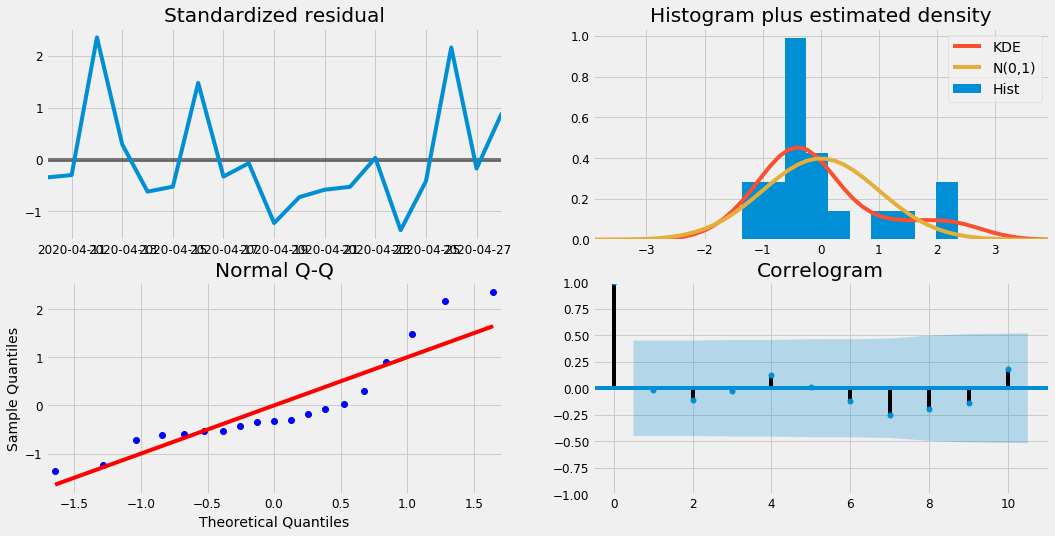

In [24]:
recovered_results.plot_diagnostics(figsize=(16, 8))
plt.show()

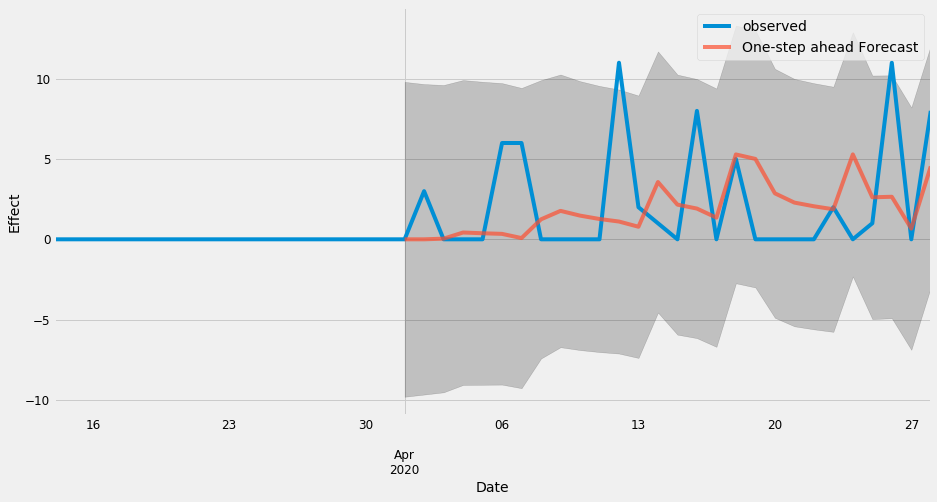

In [25]:
recovered_pred = recovered_results.get_prediction(start=pd.to_datetime('2020-04-01'), dynamic=False)
recovered_pred_ci = recovered_pred.conf_int()
recovered_ax = recovered['2020':].plot(label='observed')
recovered_pred.predicted_mean.plot(ax=recovered_ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.2)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [26]:
recovered_forecasted = recovered_pred.predicted_mean
recovered_truth = recovered['2020-04-01':]
recovered_mse = ((recovered_forecasted - recovered_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(recovered_mse, 2)))

The Mean Squared Error of our forecasts is 13.93


In [27]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(recovered_mse), 2)))

The Root Mean Squared Error of our forecasts is 3.73


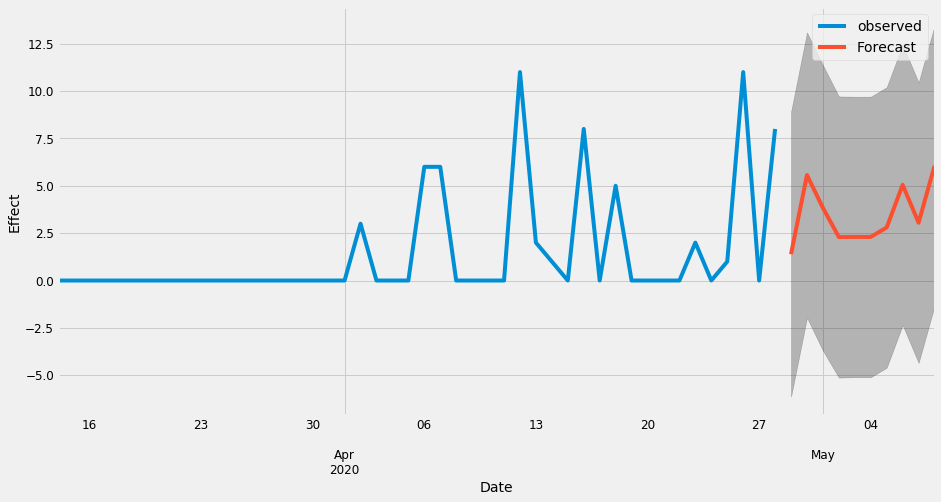

In [28]:
recovered_pred_uc = recovered_results.get_forecast(steps=10)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='k', alpha=.25)
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

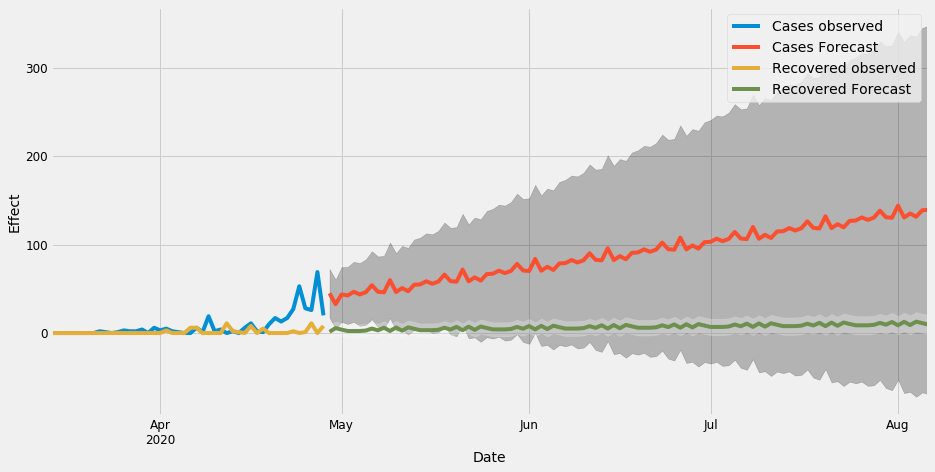

In [29]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_ax = cases.plot(label='Cases observed', figsize=(14, 7))
cases_pred_uc.predicted_mean.plot(ax=cases_ax, label='Cases Forecast')
cases_ax.fill_between(cases_pred_ci.index,
                cases_pred_ci.iloc[:, 0],
                cases_pred_ci.iloc[:, 1], color='k', alpha=.25)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_ax = recovered.plot(label='Recovered observed', figsize=(14, 7))
recovered_pred_uc.predicted_mean.plot(ax=recovered_ax, label='Recovered Forecast')
recovered_ax.fill_between(recovered_pred_ci.index,
                recovered_pred_ci.iloc[:, 0],
                recovered_pred_ci.iloc[:, 1], color='w', alpha=.25)

cases_ax.set_xlabel('Date')
cases_ax.set_ylabel('Effect')
recovered_ax.set_xlabel('Date')
recovered_ax.set_ylabel('Effect')
plt.legend()
plt.show()

In [30]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

In [31]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=0.0].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [32]:
int(np.mean(cases_result_date)[0])

89

In [33]:
int(min(cases_result_date[0]))

32

In [34]:
cases_end_date = str(cases_result_date.index[cases_result_date[0]<=np.ceil(min(cases_result_date[0]))].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-04-30


In [35]:
cases_pred_uc = cases_results.get_forecast(steps=100)
cases_pred_ci = cases_pred_uc.conf_int()
cases_result_date = pd.DataFrame(cases_pred_uc.predicted_mean)

recovered_pred_uc = recovered_results.get_forecast(steps=100)
recovered_pred_ci = recovered_pred_uc.conf_int()
recovered_result_date = pd.DataFrame(recovered_pred_uc.predicted_mean)

In [36]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(cases_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

IndexError: list index out of range

In [37]:
cases_end_date = str(cases_result_date.index[recovered_result_date[0]>=int(np.mean(recovered_result_date)[0])].tolist()[0])
print("The predicted last date on which the cases will become 0 is: " + cases_end_date.split()[0])

The predicted last date on which the cases will become 0 is: 2020-05-08


In [38]:
import seaborn as sns
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 9, 6

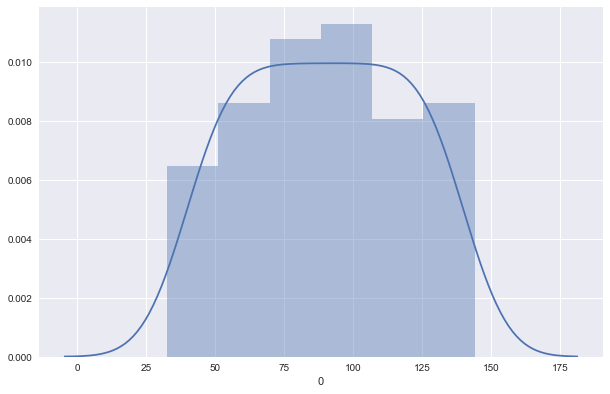

In [39]:
sns.distplot(cases_result_date[0])
plt.show(block=True)

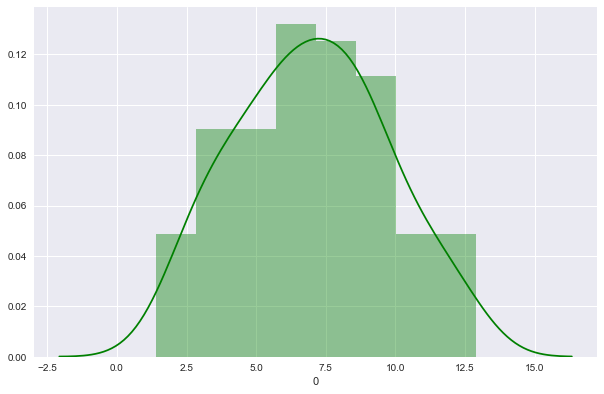

In [40]:
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

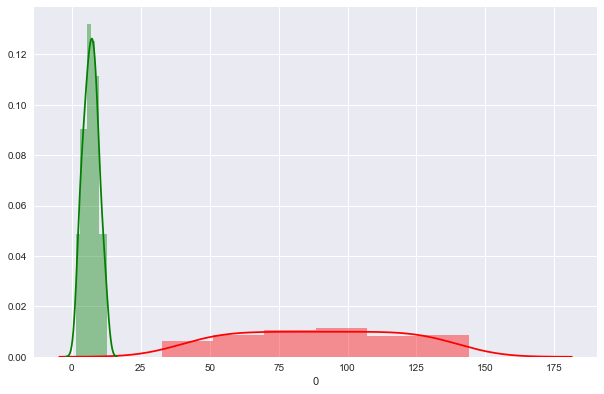

In [41]:
sns.distplot(cases_result_date[0],color='red')
sns.distplot(recovered_result_date[0],color='green')
plt.show(block=True)

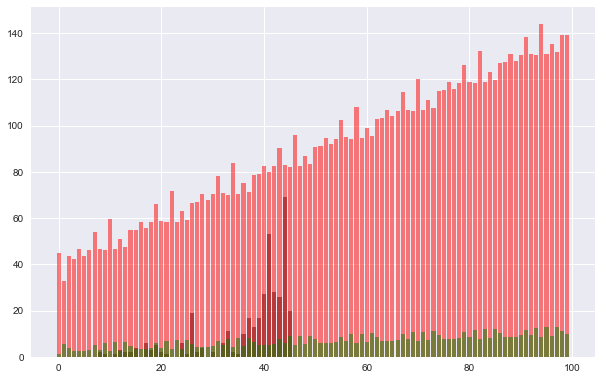

In [42]:
plt.bar([i for i in range(len(total_data['Cases']))], total_data['Cases'], align='center', alpha=0.5, color = 'black')
plt.bar([i for i in range(len(total_data['Recovered']))], total_data['Recovered'][0], align='center', alpha=0.5, color = 'blue')
plt.bar([i for i in range(len(cases_result_date))], cases_result_date[0], align='center', alpha=0.5, color = 'red')
plt.bar([i for i in range(len(recovered_result_date))], recovered_result_date[0], align='center', alpha=0.5, color='green')
plt.show()